# 1) Extract reviews of any product from ecommerce website like amazon
# 2) Perform emotion mining


In [1]:
#! pip install requests
#! pip install bs4

# WebScrapping using Beautiful-Soup

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
headers = {
    # 'Accept-Encoding': 'gzip, deflate, sdch',
    'Accept-Language': 'en-US,en;q=0.8',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Referer': 'http://www.wikipedia.org/',
    'Connection': 'keep-alive',
}

# Taking Three Pages Reviews of Iphone 13 from Amazon

In [4]:
pages = [
    "https://www.amazon.in/product-reviews/B09G9FPGTN",
    "https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_next_2?pageNumber=2",
    "https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_getr_d_paging_btm_next_3?pageNumber=3"
]

In [5]:
resp = requests.get(pages[0], headers=headers)
resp.text

'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sl

In [6]:
soup = BeautifulSoup(resp.text, 'html.parser')

In [7]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.

In [8]:
reviews = soup.find_all("div", {"class" : "a-section review aok-relative"})

In [9]:
len(reviews)

10

In [10]:
reviews[0]

<div class="a-section review aok-relative" data-hook="review" id="R3JJ35VQQ8J1OP"><div class="a-row a-spacing-none" id="R3JJ35VQQ8J1OP-review-card"><div class="a-section celwidget" id="customer_review-R3JJ35VQQ8J1OP"><div class="a-row a-spacing-mini" data-hook="genome-widget"><a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AH5UDCAFP5MAU2O3EGVYFN4RIG3A/ref=cm_cr_arp_d_gw_btm?ie=UTF8"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">Kavya Gupta</span></div></a></div><div class="a-row"><a c

In [11]:
def get_review_body(soup_obj):
    try:
        review_body = soup_obj.find("span",
                                   {"class": "a-size-base review-text review-text-content"}
                                   ).get_text().strip()
        return review_body
    except Exception as e:
        print("No body")

In [12]:
get_review_body(reviews[0])

'This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone'

In [13]:
def get_review_components(soup_obj):
    return {
        "Review": get_review_body(soup_obj)
        
    }

In [14]:
get_review_components(reviews[7])

{'Review': 'My honest review after going broke buying this depreciating object.I have been using android phones since the last 10 years and finally decided to switch to iPhone! I used to roast iPhone for its prices, lack of features and also things like power adapter not given in box etc, but my last android phone (iqoo 7 legend) had lot of software related issues and battery issues after updating it to android 12, tired of bugs and software glitches in android, I finally decided to buy a iPhone and switch from android to iOS And Boy Was I right!I never even held an iPhone In my life before because of its price, but now I made a great choice even if I had to spend all my savings on it.iPhone 13 is so smooth that even my IQOO 7 Legend with 120hz feels slower than it even if iPhone has only 60hz. And I can’t believe what I’m seeing, all the games/apps are so much smoother and optimised than on android.I was very sceptical about the charging speed of an iPhone Because in Iqoo I had 66w fa

In [15]:
records = [get_review_components(rev) for rev in reviews]
records

[{'Review': 'This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone'},
 {'Review': 'There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam'},
 {'Review': 'You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂'},
 {'Review': 'Just but iphone 12!It’s not worth the money!Unless ur from BJP or something where you’re full with corrupt money, then go ahead.'},
 {'Review': 'i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on  manday and cant study

# Converting Reviews into Dataframe

In [16]:
df = pd.DataFrame.from_records(records)
df.head()

,Review
0,This product is duplicate of iPhone 12 only ca...
1,There was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...
4,i am poor and i cant afford it lmao xdxdxdxdxd...


In [17]:
All_reviews=[]
for u in pages:
    print(u)
    resp = requests.get(u, headers=headers)
    soup = BeautifulSoup(resp.text, 'html.parser')
    reviews = soup.find_all("div", {"class" : "a-section review aok-relative"})
    records = [get_review_components(rev) for rev in reviews]
    All_reviews.extend(records)
    

https://www.amazon.in/product-reviews/B09G9FPGTN
https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_next_2?pageNumber=2
https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_getr_d_paging_btm_next_3?pageNumber=3


In [18]:
out = pd.DataFrame.from_records(All_reviews)
out.head()

,Review
0,This product is duplicate of iPhone 12 only ca...
1,There was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...
4,i am poor and i cant afford it lmao xdxdxdxdxd...


In [19]:
out.shape

(30, 1)

In [20]:
out.tail()

,Review
25,Rating 9/10camera 9battery 9 pubg 5 hrs smooth...
26,Apple making fools of images ridden duffers. O...
27,Today I got my iphone 13 Starlight and guess w...
28,This is my first IPhonePhone looks and feels p...
29,I ordered this phone on 3rd may and got delive...


# Saving File to CSV

In [21]:
out.to_csv("amazon_iphone13_reviews.csv")

# Now importing File to build model

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
review = pd.read_csv("amazon_iphone13_reviews.csv")

In [24]:
review.head()

,Unnamed: 0,Review
0,0,This product is duplicate of iPhone 12 only ca...
1,1,There was a hairline scratch on the screen whi...
2,2,You should be a bigggggg bot to buy this phone...
3,3,Just but iphone 12!It’s not worth the money!Un...
4,4,i am poor and i cant afford it lmao xdxdxdxdxd...


In [25]:
review.tail()

,Unnamed: 0,Review
25,25,Rating 9/10camera 9battery 9 pubg 5 hrs smooth...
26,26,Apple making fools of images ridden duffers. O...
27,27,Today I got my iphone 13 Starlight and guess w...
28,28,This is my first IPhonePhone looks and feels p...
29,29,I ordered this phone on 3rd may and got delive...


# EDA

In [26]:
review.isnull().sum()

Unnamed: 0    0
Review        0
dtype: int64

In [27]:
review.duplicated().sum()

0

In [28]:
review.drop(["Unnamed: 0"],axis=1,inplace=True)

In [29]:
review

,Review
0,This product is duplicate of iPhone 12 only ca...
1,There was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...
4,i am poor and i cant afford it lmao xdxdxdxdxd...
5,The media could not be loaded.\n ...
6,I do not have money that I can get a phone but...
7,My honest review after going broke buying this...
8,Same as I phone 12 😑. Who so ever is reading t...
9,The media could not be loaded.\n ...


# Importing Libraries for NlP

In [30]:
import re
import time
import string
import warnings
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Zoheb Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nlt

# Text Preprocessing

# Checking the Unnecessary words

In [31]:
review.Review.str.contains('https://').value_counts() / len(review)

False    1.0
Name: Review, dtype: float64

In [32]:
review.Review.str.contains('@').value_counts() / len(review)

False    1.0
Name: Review, dtype: float64

In [33]:
print('Total Reviews this period:', len(review.index), '\n')

Total Reviews this period: 30 



# Tokenization

In [34]:
from nltk import word_tokenize
tokens = review.Review.map(word_tokenize)


In [35]:
review=[Text.strip() for Text in review.Review] # remove both the leading and the trailing characters
review=[Text for Text in review if Text] # removes empty strings, because they are considered in Python as False
review[0:10]

['This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone',
 'There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam',
 'You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂',
 'Just but iphone 12!It’s not worth the money!Unless ur from BJP or something where you’re full with corrupt money, then go ahead.',
 'i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on  manday and cant study mole concept and got bored thats why i came here to write 

In [36]:
review_text=' '.join(review)
review_text[:1000]

'This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂 Just but iphone 12!It’s not worth the money!Unless ur from BJP or something where you’re full with corrupt money, then go ahead. i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on  manday and cant study mole concept and got bored thats why i came here to write this review if yo

In [37]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(review_text)
print(review_tokens[:100])

['This', 'product', 'is', 'duplicate', 'of', 'iPhone', '12', 'only', 'camera', 'design', 'changed', '.', 'Very', 'low', 'quality', 'of', 'this', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'There', 'was', 'a', 'hairline', 'scratch', 'on', 'the', 'screen', 'which', 'is', 'not', 'clearly', 'visible', 'directly', '.', 'When', 'we', 'tried', 'contacting', 'Amazon', 'for', 'the', 'replacement', ',', 'they', 'asked', 'us', 'to', 'connect', 'to', 'apple', 'and', 'when', 'connected', 'to', 'apple', ',', 'they', 'asked', 'to', 'connect', 'with', 'Amazon', '.', 'Blame', 'game', 'begins', 'and', 'we', 'end', 'up', 'paying', 'the', 'price', '.', 'Awfull', 'service', '.', 'I', 'am', 'going', 'to', 'tag', 'on', 'the', 'social', 'media', 'both', 'Amazon', 'and', 'apple', '.', 'Such', 'a', 'big', 'scam', 'You', 'should']


In [38]:
review_tokens_text=' '.join(review_tokens)
review_tokens_text[:1000]

'This product is duplicate of iPhone 12 only camera design changed . Very low quality of this product Buy Samsung mobile phone There was a hairline scratch on the screen which is not clearly visible directly . When we tried contacting Amazon for the replacement , they asked us to connect to apple and when connected to apple , they asked to connect with Amazon . Blame game begins and we end up paying the price . Awfull service . I am going to tag on the social media both Amazon and apple . Such a big scam You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that ’ s the best 😂 Just but iphone 12 ! It ’ s not worth the money ! Unless ur from BJP or something where you ’ re full with corrupt money , then go ahead . i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on manday and cant study mole concept and got bored thats why i came here to writ

# Removing Punctuation from Text

In [39]:
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'This product is duplicate of iPhone 12 only camera design changed  Very low quality of this product Buy Samsung mobile phone There was a hairline scratch on the screen which is not clearly visible directly  When we tried contacting Amazon for the replacement  they asked us to connect to apple and when connected to apple  they asked to connect with Amazon  Blame game begins and we end up paying the price  Awfull service  I am going to tag on the social media both Amazon and apple  Such a big scam You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that ’ s the best 😂 Just but iphone 12  It ’ s not worth the money  Unless ur from BJP or something where you ’ re full with corrupt money  then go ahead  i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on manday and cant study mole concept and got bored thats why i came here to write this revie

# Removing URL from Text

In [40]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'This product is duplicate of iPhone 12 only camera design changed  Very low quality of this product Buy Samsung mobile phone There was a hairline scratch on the screen which is not clearly visible directly  When we tried contacting Amazon for the replacement  they asked us to connect to apple and when connected to apple  they asked to connect with Amazon  Blame game begins and we end up paying the price  Awfull service  I am going to tag on the social media both Amazon and apple  Such a big scam You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that ’ s the best 😂 Just but iphone 12  It ’ s not worth the money  Unless ur from BJP or something where you ’ re full with corrupt money  then go ahead  i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on manday and cant study mole concept and got bored thats why i came here to write this revie

# Applying Tokenization ion 100 words

In [41]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['This', 'product', 'is', 'duplicate', 'of', 'iPhone', '12', 'only', 'camera', 'design', 'changed', 'Very', 'low', 'quality', 'of', 'this', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'There', 'was', 'a', 'hairline', 'scratch', 'on', 'the', 'screen', 'which', 'is', 'not', 'clearly', 'visible', 'directly', 'When', 'we', 'tried', 'contacting', 'Amazon', 'for', 'the', 'replacement', 'they', 'asked', 'us', 'to', 'connect', 'to', 'apple', 'and', 'when', 'connected', 'to', 'apple', 'they', 'asked', 'to', 'connect', 'with', 'Amazon', 'Blame', 'game', 'begins', 'and', 'we', 'end', 'up', 'paying', 'the', 'price', 'Awfull', 'service', 'I', 'am', 'going', 'to', 'tag', 'on', 'the', 'social', 'media', 'both', 'Amazon', 'and', 'apple', 'Such', 'a', 'big', 'scam', 'You', 'should', 'be', 'a', 'bigggggg', 'bot', 'to', 'buy', 'this', 'phoneYou']


In [42]:
len(text_tokens)

2538

# Removing Stopwords

In [43]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['lmao','xdxdxdxdxd']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['This', 'product', 'duplicate', 'iPhone', '12', 'camera', 'design', 'changed', 'Very', 'low', 'quality', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'There', 'hairline', 'scratch', 'screen', 'clearly', 'visible', 'directly', 'When', 'tried', 'contacting', 'Amazon', 'replacement', 'asked', 'us', 'connect', 'apple', 'connected', 'apple', 'asked', 'connect', 'Amazon', 'Blame', 'game', 'begins', 'end', 'paying', 'price', 'Awfull', 'service', 'I', 'going', 'tag', 'social', 'media', 'Amazon', 'apple', 'Such', 'big', 'scam', 'You', 'bigggggg', 'bot', 'buy', 'phoneYou', 'could', 'get', 'iPhone', '12', 'Pro', '’', 'best', '😂', 'Just', 'iphone', '12', 'It', '’', 'worth', 'money', 'Unless', 'ur', 'BJP', 'something', '’', 'full', 'corrupt', 'money', 'go', 'ahead', 'poor', 'cant', 'afford', 'money', 'flex', 'buy', 'bored', 'thats', 'writing', 'review', 'drinking', 'coffee', 'chemistry', 'exam', 'manday']


In [44]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['this', 'product', 'duplicate', 'iphone', '12', 'camera', 'design', 'changed', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'there', 'hairline', 'scratch', 'screen', 'clearly', 'visible', 'directly', 'when', 'tried', 'contacting', 'amazon', 'replacement', 'asked', 'us', 'connect', 'apple', 'connected', 'apple', 'asked', 'connect', 'amazon', 'blame', 'game', 'begins', 'end', 'paying', 'price', 'awfull', 'service', 'i', 'going', 'tag', 'social', 'media', 'amazon', 'apple', 'such', 'big', 'scam', 'you', 'bigggggg', 'bot', 'buy', 'phoneyou', 'could', 'get', 'iphone', '12', 'pro', '’', 'best', '😂', 'just', 'iphone', '12', 'it', '’', 'worth', 'money', 'unless', 'ur', 'bjp', 'something', '’', 'full', 'corrupt', 'money', 'go', 'ahead', 'poor', 'cant', 'afford', 'money', 'flex', 'buy', 'bored', 'thats', 'writing', 'review', 'drinking', 'coffee', 'chemistry', 'exam', 'manday']


# Applying Stemming 

In [45]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['thi', 'product', 'duplic', 'iphon', '12', 'camera', 'design', 'chang', 'veri', 'low', 'qualiti', 'product', 'buy', 'samsung', 'mobil', 'phone', 'there', 'hairlin', 'scratch', 'screen', 'clearli', 'visibl', 'directli', 'when', 'tri', 'contact', 'amazon', 'replac', 'ask', 'us', 'connect', 'appl', 'connect', 'appl', 'ask', 'connect', 'amazon', 'blame', 'game', 'begin', 'end', 'pay', 'price', 'awful', 'servic', 'i', 'go', 'tag', 'social', 'media', 'amazon', 'appl', 'such', 'big', 'scam', 'you', 'bigggggg', 'bot', 'buy', 'phoney', 'could', 'get', 'iphon', '12', 'pro', '’', 'best', '😂', 'just', 'iphon', '12', 'it', '’', 'worth', 'money', 'unless', 'ur', 'bjp', 'someth', '’', 'full', 'corrupt', 'money', 'go', 'ahead', 'poor', 'cant', 'afford', 'money', 'flex', 'buy', 'bore', 'that', 'write', 'review', 'drink', 'coffe', 'chemistri', 'exam', 'manday']


# Converting upper case into lower case

In [46]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

this product duplicate iphone 12 camera design changed very low quality product buy samsung mobile phone there hairline scratch screen clearly visible directly when tried contacting amazon replacement asked us connect apple connected apple asked connect amazon blame game begins end paying price awfull service i going tag social media amazon apple such big scam you bigggggg bot buy phoneyou could get iphone 12 pro ’ best 😂 just iphone 12 it ’ worth money unless ur bjp something ’ full corrupt money go ahead poor cant afford money flex buy bored thats writing review drinking coffee chemistry


# Applying Lemmatization

In [47]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['this', 'product', 'duplicate', 'iphone', '12', 'camera', 'design', 'change', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'there', 'hairline', 'scratch', 'screen', 'clearly', 'visible', 'directly', 'when', 'try', 'contact', 'amazon', 'replacement', 'ask', 'we', 'connect', 'apple', 'connect', 'apple', 'ask', 'connect', 'amazon', 'blame', 'game', 'begin', 'end', 'pay', 'price', 'awfull', 'service', 'I', 'go', 'tag', 'social', 'medium', 'amazon', 'apple', 'such', 'big', 'scam', 'you', 'bigggggg', 'bot', 'buy', 'phoneyou', 'could', 'get', 'iphone', '12', 'pro', "'", 'good', '😂', 'just', 'iphone', '12', 'it', "'", 'worth', 'money', 'unless', 'ur', 'bjp', 'something', "'", 'full', 'corrupt', 'money', 'go', 'ahead', 'poor', 'can', 'not', 'afford', 'money', 'flex', 'buy', 'bore', 'that', 's', 'writing', 'review', 'drink', 'coffee', 'chemistry']


In [48]:
clean_review=' '.join(lemmas)
clean_review[:1000]

"this product duplicate iphone 12 camera design change very low quality product buy samsung mobile phone there hairline scratch screen clearly visible directly when try contact amazon replacement ask we connect apple connect apple ask connect amazon blame game begin end pay price awfull service I go tag social medium amazon apple such big scam you bigggggg bot buy phoneyou could get iphone 12 pro ' good 😂 just iphone 12 it ' worth money unless ur bjp something ' full corrupt money go ahead poor can not afford money flex buy bore that s writing review drink coffee chemistry exam manday can not study mole concept get bore that s come write review read review til good justt waste time go something productive the medium could load I switch android iosthere many thing iphoneif want phone good look phone ' anything else buy iphonebattery life finecharge speed also finecamera quality also fine android phone range well camera quality one I money I get phone I dream get phone definitely fulfil 

# Applying Text Preprocessing On Dataframe

In [49]:
review = pd.read_csv("amazon_iphone13_reviews.csv")
review.drop(["Unnamed: 0"],axis=1,inplace=True)

In [50]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

# Converting into an Tidy_review

In [51]:
review['Tidy_Review'] = np.vectorize(remove_pattern)(review['Review'], "@[\w]*")
review.head(10)

,Review,Tidy_Review
0,This product is duplicate of iPhone 12 only ca...,This product is duplicate of iPhone 12 only ca...
1,There was a hairline scratch on the screen whi...,There was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...,You should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...,Just but iphone 12!It’s not worth the money!Un...
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...
5,The media could not be loaded.\n ...,The media could not be loaded.\n ...
6,I do not have money that I can get a phone but...,I do not have money that I can get a phone but...
7,My honest review after going broke buying this...,My honest review after going broke buying this...
8,Same as I phone 12 😑. Who so ever is reading t...,Same as I phone 12 😑. Who so ever is reading t...
9,The media could not be loaded.\n ...,The media could not be loaded.\n ...


# Cleaning url from Tidy_Review

In [52]:
cleaned_review = []

for index, row in review.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Tidy_Review.split() if 'http' not in word]
    cleaned_review.append(' '.join(words_without_links))

review['Tidy_Review'] = cleaned_review
review.head(10)

,Review,Tidy_Review
0,This product is duplicate of iPhone 12 only ca...,This product is duplicate of iPhone 12 only ca...
1,There was a hairline scratch on the screen whi...,There was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...,You should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...,Just but iphone 12!It’s not worth the money!Un...
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...
5,The media could not be loaded.\n ...,The media could not be loaded. I switched from...
6,I do not have money that I can get a phone but...,I do not have money that I can get a phone but...
7,My honest review after going broke buying this...,My honest review after going broke buying this...
8,Same as I phone 12 😑. Who so ever is reading t...,Same as I phone 12 😑. Who so ever is reading t...
9,The media could not be loaded.\n ...,The media could not be loaded. iPhone is so go...


# Removing '!' from Tidy_Review

In [53]:
review = review[review['Tidy_Review']!='']
review.head(10)

,Review,Tidy_Review
0,This product is duplicate of iPhone 12 only ca...,This product is duplicate of iPhone 12 only ca...
1,There was a hairline scratch on the screen whi...,There was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...,You should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...,Just but iphone 12!It’s not worth the money!Un...
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...
5,The media could not be loaded.\n ...,The media could not be loaded. I switched from...
6,I do not have money that I can get a phone but...,I do not have money that I can get a phone but...
7,My honest review after going broke buying this...,My honest review after going broke buying this...
8,Same as I phone 12 😑. Who so ever is reading t...,Same as I phone 12 😑. Who so ever is reading t...
9,The media could not be loaded.\n ...,The media could not be loaded. iPhone is so go...


# Rmoving Duplicate Review

In [54]:
review.drop_duplicates(subset=['Tidy_Review'], keep=False)
review.head(10)

,Review,Tidy_Review
0,This product is duplicate of iPhone 12 only ca...,This product is duplicate of iPhone 12 only ca...
1,There was a hairline scratch on the screen whi...,There was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...,You should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...,Just but iphone 12!It’s not worth the money!Un...
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...
5,The media could not be loaded.\n ...,The media could not be loaded. I switched from...
6,I do not have money that I can get a phone but...,I do not have money that I can get a phone but...
7,My honest review after going broke buying this...,My honest review after going broke buying this...
8,Same as I phone 12 😑. Who so ever is reading t...,Same as I phone 12 😑. Who so ever is reading t...
9,The media could not be loaded.\n ...,The media could not be loaded. iPhone is so go...


In [55]:
review = review.reset_index(drop=True)
review.head(10)

,Review,Tidy_Review
0,This product is duplicate of iPhone 12 only ca...,This product is duplicate of iPhone 12 only ca...
1,There was a hairline scratch on the screen whi...,There was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...,You should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...,Just but iphone 12!It’s not worth the money!Un...
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...
5,The media could not be loaded.\n ...,The media could not be loaded. I switched from...
6,I do not have money that I can get a phone but...,I do not have money that I can get a phone but...
7,My honest review after going broke buying this...,My honest review after going broke buying this...
8,Same as I phone 12 😑. Who so ever is reading t...,Same as I phone 12 😑. Who so ever is reading t...
9,The media could not be loaded.\n ...,The media could not be loaded. iPhone is so go...


# Cleaning Words from Text

In [56]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [57]:
review['Tidy_Review'] = review['Tidy_Review'].apply(lambda x: clean_text(x))
review.head(10)

,Review,Tidy_Review
0,This product is duplicate of iPhone 12 only ca...,this product is duplicate of iphone only came...
1,There was a hairline scratch on the screen whi...,there was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...,you should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...,just but iphone ’s not worth the moneyunless u...
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...
5,The media could not be loaded.\n ...,the media could not be loaded i switched from ...
6,I do not have money that I can get a phone but...,i do not have money that i can get a phone but...
7,My honest review after going broke buying this...,my honest review after going broke buying this...
8,Same as I phone 12 😑. Who so ever is reading t...,same as i phone 😑 who so ever is reading this...
9,The media could not be loaded.\n ...,the media could not be loaded iphone is so goo...


# Removing Emoji from Tidy_Review

In [58]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [59]:
review['Tidy_Review']=review['Tidy_Review'].apply(lambda x: remove_emoji(x))
review.head(10)

,Review,Tidy_Review
0,This product is duplicate of iPhone 12 only ca...,this product is duplicate of iphone only came...
1,There was a hairline scratch on the screen whi...,there was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...,you should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...,just but iphone ’s not worth the moneyunless u...
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...
5,The media could not be loaded.\n ...,the media could not be loaded i switched from ...
6,I do not have money that I can get a phone but...,i do not have money that i can get a phone but...
7,My honest review after going broke buying this...,my honest review after going broke buying this...
8,Same as I phone 12 😑. Who so ever is reading t...,same as i phone who so ever is reading this ...
9,The media could not be loaded.\n ...,the media could not be loaded iphone is so goo...


# Applying Tokenization on Tidy_Review

In [60]:
review['Tokenized_Review'] = review['Tidy_Review'].apply(lambda x: nltk.word_tokenize(x))
review.head(10)

,Review,Tidy_Review,Tokenized_Review
0,This product is duplicate of iPhone 12 only ca...,this product is duplicate of iphone only came...,"[this, product, is, duplicate, of, iphone, onl..."
1,There was a hairline scratch on the screen whi...,there was a hairline scratch on the screen whi...,"[there, was, a, hairline, scratch, on, the, sc..."
2,You should be a bigggggg bot to buy this phone...,you should be a bigggggg bot to buy this phone...,"[you, should, be, a, bigggggg, bot, to, buy, t..."
3,Just but iphone 12!It’s not worth the money!Un...,just but iphone ’s not worth the moneyunless u...,"[just, but, iphone, ’, s, not, worth, the, mon..."
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...,"[i, am, poor, and, i, cant, afford, it, lmao, ..."
5,The media could not be loaded.\n ...,the media could not be loaded i switched from ...,"[the, media, could, not, be, loaded, i, switch..."
6,I do not have money that I can get a phone but...,i do not have money that i can get a phone but...,"[i, do, not, have, money, that, i, can, get, a..."
7,My honest review after going broke buying this...,my honest review after going broke buying this...,"[my, honest, review, after, going, broke, buyi..."
8,Same as I phone 12 😑. Who so ever is reading t...,same as i phone who so ever is reading this ...,"[same, as, i, phone, who, so, ever, is, readin..."
9,The media could not be loaded.\n ...,the media could not be loaded iphone is so goo...,"[the, media, could, not, be, loaded, iphone, i..."


In [61]:
review.drop(['Tokenized_Review'],axis=1,inplace=True)

# Removing Stopwords from Tidy_Review and making Absolute_Tidy_Review

In [62]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = ['im','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4',"ggggg","It's","ur","’s",'lmao','xdxdxdxdxd']
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_review = []

for index, row in review.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Tidy_Review.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_review.append(' '.join(words_without_stopwords))
    
review['Absolute_Tidy_Review'] = cleaned_review
review.head(10)

,Review,Tidy_Review,Absolute_Tidy_Review
0,This product is duplicate of iPhone 12 only ca...,this product is duplicate of iphone only came...,product duplicate iphone camera design changed...
1,There was a hairline scratch on the screen whi...,there was a hairline scratch on the screen whi...,hairline scratch screen clearly visible direct...
2,You should be a bigggggg bot to buy this phone...,you should be a bigggggg bot to buy this phone...,bigggggg bot buy phoneyou could get iphone pro...
3,Just but iphone 12!It’s not worth the money!Un...,just but iphone ’s not worth the moneyunless u...,iphone worth moneyunless bjp something you’re ...
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...,poor cant afford money flex buy bored thats wr...
5,The media could not be loaded.\n ...,the media could not be loaded i switched from ...,media could loaded switched android iosthere m...
6,I do not have money that I can get a phone but...,i do not have money that i can get a phone but...,money get phone dream get phone definitely ful...
7,My honest review after going broke buying this...,my honest review after going broke buying this...,honest review going broke buying depreciating ...
8,Same as I phone 12 😑. Who so ever is reading t...,same as i phone who so ever is reading this ...,phone ever reading review suggest go phone
9,The media could not be loaded.\n ...,the media could not be loaded iphone is so goo...,media could loaded iphone good phone four time...


# Applying Tokenization on Absolute_Tidy_Review

In [63]:
Tokenized_Review = review['Absolute_Tidy_Review'].apply(lambda x: x.split())
Tokenized_Review.head(10)

0    [product, duplicate, iphone, camera, design, c...
1    [hairline, scratch, screen, clearly, visible, ...
2    [bigggggg, bot, buy, phoneyou, could, get, iph...
3    [iphone, worth, moneyunless, bjp, something, y...
4    [poor, cant, afford, money, flex, buy, bored, ...
5    [media, could, loaded, switched, android, iost...
6    [money, get, phone, dream, get, phone, definit...
7    [honest, review, going, broke, buying, depreci...
8    [phone, ever, reading, review, suggest, go, ph...
9    [media, could, loaded, iphone, good, phone, fo...
Name: Absolute_Tidy_Review, dtype: object

# Applying Lemmatization on Absolute_Tidy_Review

In [64]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Review = Tokenized_Review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Review.head(10)

[nltk_data] Downloading package omw-1.4 to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [product, duplicate, iphone, camera, design, c...
1    [hairline, scratch, screen, clearly, visible, ...
2    [bigggggg, bot, buy, phoneyou, could, get, iph...
3    [iphone, worth, moneyunless, bjp, something, y...
4    [poor, cant, afford, money, flex, buy, bored, ...
5    [medium, could, loaded, switched, android, ios...
6    [money, get, phone, dream, get, phone, definit...
7    [honest, review, going, broke, buying, depreci...
8    [phone, ever, reading, review, suggest, go, ph...
9    [medium, could, loaded, iphone, good, phone, f...
Name: Absolute_Tidy_Review, dtype: object

# Applying Tokenization again On Absolute _Tidy_Review

In [65]:
for i, tokens in enumerate(Tokenized_Review):
    Tokenized_Review[i] = ' '.join(tokens)

review['Absolute_Tidy_Review'] = Tokenized_Review
review.head(10)

,Review,Tidy_Review,Absolute_Tidy_Review
0,This product is duplicate of iPhone 12 only ca...,this product is duplicate of iphone only came...,product duplicate iphone camera design changed...
1,There was a hairline scratch on the screen whi...,there was a hairline scratch on the screen whi...,hairline scratch screen clearly visible direct...
2,You should be a bigggggg bot to buy this phone...,you should be a bigggggg bot to buy this phone...,bigggggg bot buy phoneyou could get iphone pro...
3,Just but iphone 12!It’s not worth the money!Un...,just but iphone ’s not worth the moneyunless u...,iphone worth moneyunless bjp something you’re ...
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...,poor cant afford money flex buy bored thats wr...
5,The media could not be loaded.\n ...,the media could not be loaded i switched from ...,medium could loaded switched android iosthere ...
6,I do not have money that I can get a phone but...,i do not have money that i can get a phone but...,money get phone dream get phone definitely ful...
7,My honest review after going broke buying this...,my honest review after going broke buying this...,honest review going broke buying depreciating ...
8,Same as I phone 12 😑. Who so ever is reading t...,same as i phone who so ever is reading this ...,phone ever reading review suggest go phone
9,The media could not be loaded.\n ...,the media could not be loaded iphone is so goo...,medium could loaded iphone good phone four tim...


# Applying Count_vectorizer 

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(lemmas)

In [67]:
print(cv.get_feature_names()[109:200])

['bug', 'build', 'but', 'button', 'buy', 'call', 'camera', 'camerathis', 'camerave', 'can', 'capture', 'card', 'care', 'centre', 'change', 'charge', 'charger', 'cheap', 'check', 'chemistry', 'chinese', 'chip', 'choice', 'choose', 'cinematic', 'class', 'clearing', 'clearly', 'click', 'clone', 'coffee', 'colour', 'come', 'comfortable', 'comment', 'commentsecurity', 'compare', 'comprise', 'concept', 'confess', 'confuse', 'connect', 'connection', 'contact', 'control', 'corner', 'corrupt', 'could', 'coverage', 'create', 'critical', 'current', 'customer', 'customisation', 'data', 'date', 'datum', 'day', 'dealbut', 'decent', 'decide', 'definitely', 'deliberately', 'deliver', 'delivery', 'dent', 'depend', 'depreciate', 'design', 'deteriorate', 'device', 'deviceoverall', 'diagonal', 'dialpad', 'difference', 'difficulty', 'digest', 'directly', 'disappoint', 'disappointed', 'disappointingdisplay', 'discount', 'display', 'do', 'dolby', 'double', 'downside', 'drain', 'dream', 'drink', 'drop']


C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
print(cv.get_feature_names()[:100])

['10', '100', '1010', '10design', '10faceid', '11', '12', '120', '120hz', '1212', '12hrs', '12hrsdisplay', '13', '1800rs', '20', '20w', '24', '2hrs', '3100', '3rd', '40k', '40kyou', '45mbps', '48hrs', '4hrs', '60hz', '61', '66w', '6minutes', '7pro', '80k', '8hrs', '90k', '910', '9battery', '9performance', '9software', '9sound', 'able', 'access', 'actionvery', 'activate', 'actually', 'adapter', 'adaptor', 'afford', 'ahead', 'airtel', 'allcamera', 'allow', 'almost', 'also', 'always', 'amazing', 'amazon', 'amount', 'and', 'android', 'angle', 'animation', 'annoying', 'annoyingbut', 'anyone', 'anything', 'app', 'apple', 'around', 'as', 'as1', 'ask', 'aspect', 'aspectbattery', 'assuming', 'at', 'attach', 'audio', 'authorize', 'avg', 'awfull', 'back', 'backup', 'bad', 'bar', 'basic', 'battery', 'batteryfor', 'be', 'beautiful', 'because', 'begin', 'believe', 'bgmi', 'big', 'bigggggg', 'bjp', 'black', 'blame', 'bluntly', 'boo', 'book']


In [69]:
print(review_cv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [70]:
print(review_cv.toarray().shape)

(1584, 682)


# Applying Count_Vectorizer using NGrams

In [71]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [72]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['12', '13', 'also', 'amazon', 'and', 'android', 'apple', 'bar', 'battery', 'bgmi', 'brick', 'bug', 'buy', 'camera', 'can', 'care', 'charger', 'cheap', 'check', 'connect', 'could', 'datum', 'day', 'delivery', 'device', 'display', 'do', 'even', 'ever', 'extra', 'extreme', 'face', 'fast', 'feature', 'feel', 'find', 'first', 'game', 'get', 'give', 'go', 'good', 'got', 'great', 'hand', 'happy', 'high', 'improve', 'in', 'io', 'iphone', 'iqoo', 'issue', 'its', 'keep', 'life', 'like', 'load', 'look', 'low', 'make', 'medium', 'money', 'month', 'move', 'much', 'my', 'network', 'new', 'normal', 'not', 'nothing', 'one', 'oneplus', 'people', 'phone', 'premium', 'price', 'pro', 'product', 'quality', 'really', 'replacement', 'review', 'say', 'screen', 'software', 'speed', 'spend', 'switch', 'the', 'thing', 'this', 'time', 'use', 'user', 'want', 'well', 'worth', 'would']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Applying TF-IDF

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [74]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '1010', '10design', '10faceid', '11', '12', '120', '120hz', '1212', '12hrs', '12hrsdisplay', '13', '1800rs', '20', '20w', '24', '2hrs', '3100', '3rd', '40k', '40kyou', '45mbps', '48hrs', '4hrs', '60hz', '61', '66w', '6minutes', '7pro', '80k', '8hrs', '90k', '910', '9battery', '9performance', '9software', '9sound', 'able', 'access', 'actionvery', 'activate', 'actually', 'adapter', 'adaptor', 'afford', 'ahead', 'airtel', 'allcamera', 'allow', 'almost', 'also', 'always', 'amazing', 'amazon', 'amount', 'and', 'android', 'angle', 'animation', 'annoying', 'annoyingbut', 'anyone', 'anything', 'app', 'apple', 'around', 'as', 'as1', 'ask', 'aspect', 'aspectbattery', 'assuming', 'at', 'attach', 'audio', 'authorize', 'avg', 'awfull', 'back', 'backup', 'bad', 'bar', 'basic', 'battery', 'batteryfor', 'be', 'beautiful', 'because', 'begin', 'believe', 'bgmi', 'big', 'bigggggg', 'bjp', 'black', 'blame', 'bluntly', 'boo', 'bore', 'box', 'brick', 'bug', 'but', 'buy', 'call', 'camera', 'can

# NER

In [75]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_review[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [76]:
for token in doc_block[:50]:
    print(token,token.pos_)  

this DET
product NOUN
duplicate VERB
iphone NOUN
12 NUM
camera NOUN
design NOUN
change NOUN
very ADV
low ADJ
quality NOUN
product NOUN
buy VERB
samsung NOUN
mobile ADJ
phone NOUN
there ADV
hairline NOUN
scratch NOUN
screen NOUN
clearly ADV
visible ADJ
directly ADV
when SCONJ
try VERB
contact NOUN
amazon PROPN
replacement PROPN
ask NOUN
we PRON
connect VERB
apple NOUN
connect VERB
apple PROPN
ask PROPN
connect VERB
amazon PROPN
blame NOUN
game NOUN
begin VERB
end VERB
pay NOUN
price NOUN
awfull NOUN
service NOUN
I PRON
go VERB
tag VERB
social ADJ
medium ADJ


# Taking out only Noun and Verb from Text

In [77]:
one_block=clean_review
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['buy', 'object', 'use', 'phone', 'year', 'decide', 'switch', 'iphone', 'use', 'roast', 'iphone', 'price', 'lack', 'feature', 'thing', 'power', 'adapter', 'give', 'box', 'phone', 'iqoo', 'legend', 'lot', 'software', 'relate', 'issue', 'battery', 'issue', 'update', 'bug', 'decide', 'buy', 'iphone', 'switch', 'android', 'io', 'hold', 'iphone', 'life', 'price', 'make', 'choice', 'spend', 'saving', 'itiphone', 'smooth', 'legend', '120hz', 'feel', 'iphone', '60hz', 'believe', 'see', 'game', 'app', 'charge', 'speed', 'iphone', 'iqoo', 'charger', 'iphone', 'buy', 'charger', 'charge', 'speed', 'disappointingdisplay', 'quality', 'flagship', 'level', '’', 'fan', 'display', 'believe', 'reach', 'display', 'hand', 'build', 'quality', 'recommend', 'waste', '40k', 'buy', 'pro', 'think', 'camera', 'telephoto', 'lens', 'see', 'image', 'attach', 'quality', 'angle', 'camera', 'pic', 'shoot', 'iphone', 'angle', 'camera', 'struggle', 'camera']


# Apply Count_Vectorizer on Noun and Verbs from Text

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,35
1,iphone,33
2,buy,19
3,get,16
4,camera,14
5,battery,12
6,go,11
7,time,11
8,use,11
9,switch,10


# Applying Count_Vectorizer and TF-IDF on Absolute_Tidy_Review

In [79]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow_word_feature = bow_word_vectorizer.fit_transform(review['Absolute_Tidy_Review'])

In [80]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(review['Absolute_Tidy_Review'])

In [81]:
review

,Review,Tidy_Review,Absolute_Tidy_Review
0,This product is duplicate of iPhone 12 only ca...,this product is duplicate of iphone only came...,product duplicate iphone camera design changed...
1,There was a hairline scratch on the screen whi...,there was a hairline scratch on the screen whi...,hairline scratch screen clearly visible direct...
2,You should be a bigggggg bot to buy this phone...,you should be a bigggggg bot to buy this phone...,bigggggg bot buy phoneyou could get iphone pro...
3,Just but iphone 12!It’s not worth the money!Un...,just but iphone ’s not worth the moneyunless u...,iphone worth moneyunless bjp something you’re ...
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...,poor cant afford money flex buy bored thats wr...
5,The media could not be loaded.\n ...,the media could not be loaded i switched from ...,medium could loaded switched android iosthere ...
6,I do not have money that I can get a phone but...,i do not have money that i can get a phone but...,money get phone dream get phone definitely ful...
7,My honest review after going broke buying this...,my honest review after going broke buying this...,honest review going broke buying depreciating ...
8,Same as I phone 12 😑. Who so ever is reading t...,same as i phone who so ever is reading this ...,phone ever reading review suggest go phone
9,The media could not be loaded.\n ...,the media could not be loaded iphone is so goo...,medium could loaded iphone good phone four tim...


# Sentiment Analysis

In [82]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [83]:
sentiments_using_SIA = review.Absolute_Tidy_Review.apply(lambda review: fetch_sentiment_using_SIA(review))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Absolute_Tidy_Review
pos,22
neg,8


In [84]:
review.Tidy_Review[6]

'i do not have money that i can get a phone but i have a dream to get a phone which will definitely be fulfilled one day'

In [85]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(review.Absolute_Tidy_Review[6])

{'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.7579}

In [86]:
df=pd.DataFrame()
df['Review'] = review.Absolute_Tidy_Review
df['Scores'] = review['Tidy_Review'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,Scores
0,product duplicate iphone camera design changed...,"{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp..."
1,hairline scratch screen clearly visible direct...,"{'neg': 0.114, 'neu': 0.817, 'pos': 0.069, 'co..."
2,bigggggg bot buy phoneyou could get iphone pro...,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp..."
3,iphone worth moneyunless bjp something you’re ...,"{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp..."
4,poor cant afford money flex buy bored thats wr...,"{'neg': 0.169, 'neu': 0.792, 'pos': 0.039, 'co..."


In [87]:
df['compound']  = df['Scores'].apply(lambda Scores: Scores['compound'])
df.head()

,Review,Scores,compound
0,product duplicate iphone camera design changed...,"{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp...",-0.3384
1,hairline scratch screen clearly visible direct...,"{'neg': 0.114, 'neu': 0.817, 'pos': 0.069, 'co...",-0.6437
2,bigggggg bot buy phoneyou could get iphone pro...,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6369
3,iphone worth moneyunless bjp something you’re ...,"{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...",-0.2498
4,poor cant afford money flex buy bored thats wr...,"{'neg': 0.169, 'neu': 0.792, 'pos': 0.039, 'co...",-0.8574


In [88]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,Scores,compound,sentiment
0,product duplicate iphone camera design changed...,"{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp...",-0.3384,Negative
1,hairline scratch screen clearly visible direct...,"{'neg': 0.114, 'neu': 0.817, 'pos': 0.069, 'co...",-0.6437,Negative
2,bigggggg bot buy phoneyou could get iphone pro...,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6369,Positive
3,iphone worth moneyunless bjp something you’re ...,"{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...",-0.2498,Negative
4,poor cant afford money flex buy bored thats wr...,"{'neg': 0.169, 'neu': 0.792, 'pos': 0.039, 'co...",-0.8574,Negative
5,medium could loaded switched android iosthere ...,"{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou...",0.7469,Positive
6,money get phone dream get phone definitely ful...,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.8674,Positive
7,honest review going broke buying depreciating ...,"{'neg': 0.066, 'neu': 0.731, 'pos': 0.203, 'co...",0.9971,Positive
8,phone ever reading review suggest go phone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
9,medium could loaded iphone good phone four tim...,"{'neg': 0.187, 'neu': 0.59, 'pos': 0.222, 'com...",0.0440,Neutral


In [89]:
review.describe()

,Review,Tidy_Review,Absolute_Tidy_Review
count,30,30,30
unique,30,30,30
top,If you’re moving from iphone 11 or previous ge...,reviewing after months screen not respond...,iphone worth moneyunless bjp something you’re ...
freq,1,1,1


In [90]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
2,Positive,15
0,Negative,11
1,Neutral,4


<AxesSubplot:xlabel='sentiment', ylabel='count'>

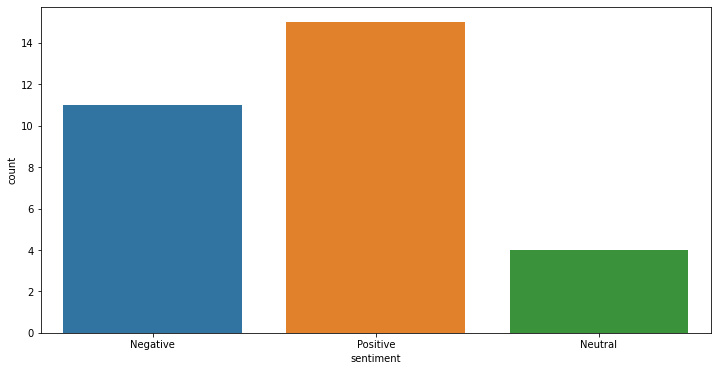

In [91]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [92]:
sentiments_using_textblob = review.Absolute_Tidy_Review.apply(lambda review: fetch_sentiment_using_textblob(review))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Absolute_Tidy_Review
pos,24
neg,6


In [93]:
review['sentiment'] = sentiments_using_SIA
review.head()

,Review,Tidy_Review,Absolute_Tidy_Review,sentiment
0,This product is duplicate of iPhone 12 only ca...,this product is duplicate of iphone only came...,product duplicate iphone camera design changed...,neg
1,There was a hairline scratch on the screen whi...,there was a hairline scratch on the screen whi...,hairline scratch screen clearly visible direct...,pos
2,You should be a bigggggg bot to buy this phone...,you should be a bigggggg bot to buy this phone...,bigggggg bot buy phoneyou could get iphone pro...,pos
3,Just but iphone 12!It’s not worth the money!Un...,just but iphone ’s not worth the moneyunless u...,iphone worth moneyunless bjp something you’re ...,pos
4,i am poor and i cant afford it lmao xdxdxdxdxd...,i am poor and i cant afford it lmao xdxdxdxdxd...,poor cant afford money flex buy bored thats wr...,neg


# Positive and Negative Emotions

In [94]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Wordcloud using Positive Emotion

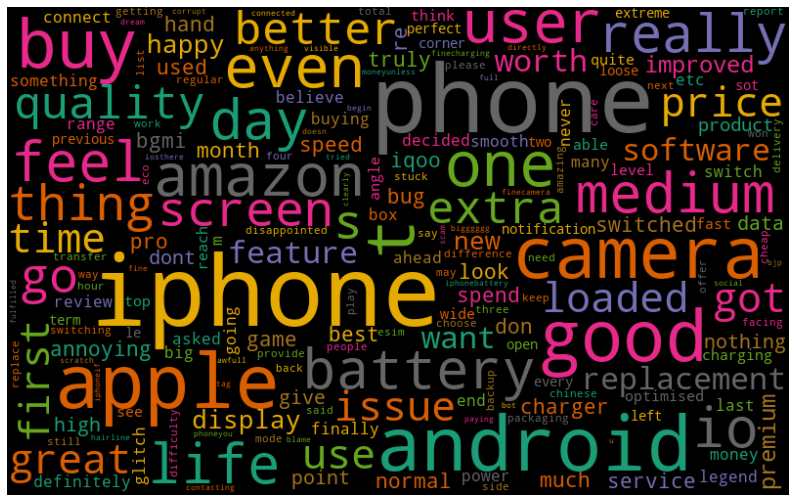

In [95]:
all_words = ' '.join([text for text in review['Absolute_Tidy_Review'][review.sentiment == 'pos']])
generate_wordcloud(all_words)

# WordCloud using Negative Emotions

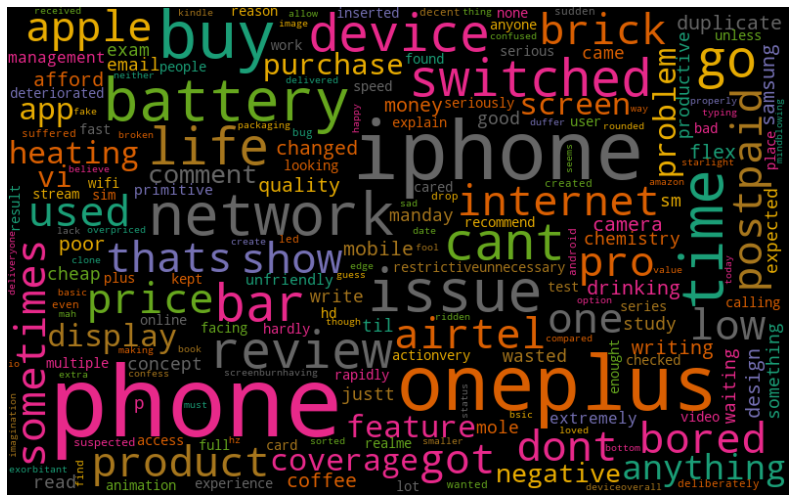

In [96]:
all_words = ' '.join([text for text in review['Absolute_Tidy_Review'][review.sentiment == 'neg']])
generate_wordcloud(all_words)

# Making positive and negative sentiment into binary

In [97]:
target_variable = review['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

# Naive-Bayes Model

In [98]:
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

In [99]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

Accuracy Score - 0.5555555555555556


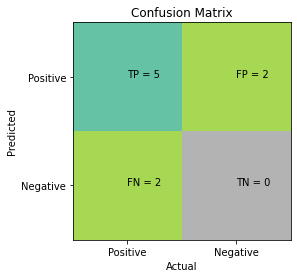

In [100]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

# Again Converting Positive and Negative words into Binary

In [101]:
review['sentiment_binary'] = review['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

# Applying Logistic-Regression

In [102]:
pipeline_ls = make_pipeline(CountVectorizer(max_df=0.90, min_df=2, tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [103]:
X_train, X_test, y_train, y_test = train_test_split(review.Absolute_Tidy_Review, review.sentiment_binary)

In [104]:
pipeline_ls.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.9, min_df=2, stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [105]:
pipeline_ls.score(X_test,y_test) 

0.75